In [2]:
import pandas as pd
import numpy as np 
import scipy as sc
import datetime
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns

La lista dei host che hanno avuto dei problemi nel passato : 
   - 814U01M70458
   - 814U01M70187
   - 814U01M70184 ==> non ci sono files 
   - 814U01M70040 ==> non ci sono files 
   - 814U01M70041

## 1- 458

In [3]:
path_458='./458'
colum=['DATE', 'VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP', 'JP', 'CNT','STS', 'MIN', 'POWER', 'AUTOBCKLIGHT', 'CURRLIGHT', 'BRIGHTNESS',
       'PAN1VOLT', 'PAN1CURR', 'BCK1VOLT', 'BCK1CURR', 'RSSI', 'time','date','Batt_id']
my_Data=pd.DataFrame(columns=colum)
for i, file in enumerate(glob.glob(path_458+"/*.csv")):
    #print(file)
    pd_df= pd.read_csv(file, sep=',')
    pd_df['DATE'] = pd.to_datetime(pd_df['DATE'])
    pd_df['time']=[x.time() for x in pd_df['DATE']]
    pd_df['date']=[x.date() for x in pd_df['DATE']]
    pd_df['Batt_id']=file.split('\\')[1][0:-10]
    my_Data=my_Data.append(pd_df,ignore_index=True)

In [4]:
my_Data = my_Data.rename({'Batt_id': 'host_id'}, axis='columns')
my_Data=my_Data[['DATE', 'VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP', 'CNT',  'POWER', 'time', 'date', 'host_id']]

In [5]:
DF_highTemp0=my_Data[my_Data.TEMP>400]
DF_highTemp0

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id


## 2- 187

In [6]:
path_187='./0187'
my_Data1=pd.DataFrame(columns=colum)
for i, file in enumerate(glob.glob(path_187+"/*.csv")):
    #print(file)
    pd_df= pd.read_csv(file, sep=',')
    pd_df['DATE'] = pd.to_datetime(pd_df['DATE'])
    pd_df['time']=[x.time() for x in pd_df['DATE']]
    pd_df['date']=[x.date() for x in pd_df['DATE']]
    pd_df['Batt_id']=file.split('\\')[1][0:-10]
    my_Data1=my_Data1.append(pd_df,ignore_index=True)

In [7]:
my_Data1 = my_Data1.rename({'Batt_id': 'host_id'}, axis='columns')
my_Data1=my_Data1[['DATE', 'VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP', 'CNT',  'POWER', 'time', 'date', 'host_id']]

In [8]:
DF_highTemp=my_Data1[my_Data1.TEMP>400]
DF_highTemp

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
1087,2020-10-31 17:48:47,28945,7196,27561,27368,660,405,16379,18062,17:48:47,2020-10-31,814U01M70187
1088,2020-10-31 17:49:46,28888,7187,27561,27351,692,410,16380,18926,17:49:46,2020-10-31,814U01M70187
1089,2020-10-31 17:50:45,28851,7189,27561,27365,652,410,16381,17841,17:50:45,2020-10-31,814U01M70187
1090,2020-10-31 17:51:44,28863,7181,27561,27341,716,415,16382,19576,17:51:44,2020-10-31,814U01M70187
1091,2020-10-31 17:52:43,28861,7197,27561,27373,635,415,16383,17381,17:52:43,2020-10-31,814U01M70187
...,...,...,...,...,...,...,...,...,...,...,...,...
39863,2020-11-17 18:20:34,29036,7153,27769,27557,661,405,41309,18215,18:20:34,2020-11-17,814U01M70187
39864,2020-11-17 18:21:33,29053,7047,27769,27576,740,405,41310,20406,18:21:33,2020-11-17,814U01M70187
39865,2020-11-17 18:22:32,29057,6937,27811,27576,694,405,41311,19137,18:22:32,2020-11-17,814U01M70187
39866,2020-11-17 18:23:31,29058,6876,27811,27593,711,405,41312,19618,18:23:31,2020-11-17,814U01M70187


In [70]:
c=[ c for c in DF_highTemp.date.unique()]
c

[datetime.date(2020, 10, 31),
 datetime.date(2020, 11, 1),
 datetime.date(2020, 11, 2),
 datetime.date(2020, 11, 3),
 datetime.date(2020, 11, 7),
 datetime.date(2020, 11, 8),
 datetime.date(2020, 11, 9),
 datetime.date(2020, 11, 10),
 datetime.date(2020, 11, 11),
 datetime.date(2020, 11, 12),
 datetime.date(2020, 11, 13),
 datetime.date(2020, 11, 14),
 datetime.date(2020, 11, 15),
 datetime.date(2020, 11, 17)]

In [74]:
df=pd.read_csv('814U01M70187_05_11.csv',sep=',')
df=df[['DATE', 'VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP', 'CNT',  'POWER']]
df.to_csv('187_5_11.csv',sep=';',index=False)

In [9]:
print('min time:',DF_highTemp.time.max())
print('max time:',DF_highTemp.time.min())

min time: 18:59:44
max time: 17:43:50


<AxesSubplot:title={'center':'La distribuzione di TEMP'}, xlabel='TEMP'>

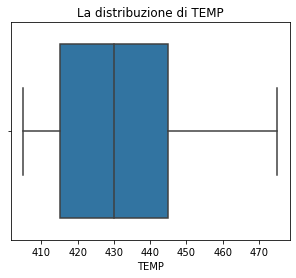

In [10]:
plt.figure(figsize=(5,4))
plt.title('La distribuzione di TEMP')
sns.boxplot(x=DF_highTemp['TEMP'])

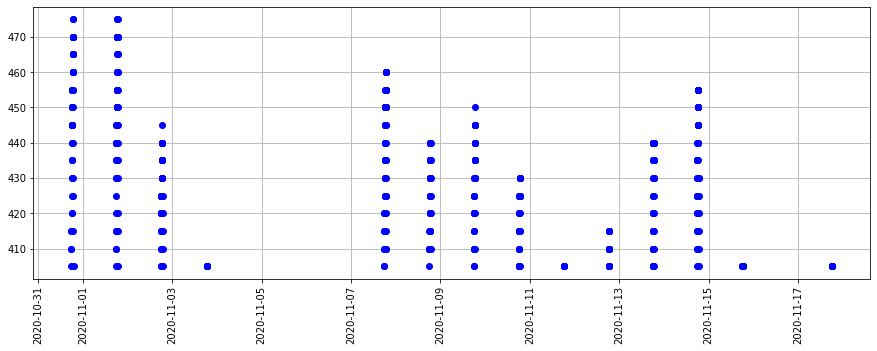

In [11]:
plt.figure(figsize=(15,5))
plt.plot(DF_highTemp['DATE'],DF_highTemp['TEMP'], 'bo')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [12]:
select_DF=my_Data1[(my_Data1.date>=datetime.date(2020,10,31)) & (my_Data1.date<datetime.date(2020,11,3))]
list_dat=[ c for c in select_DF.date.unique()]
list_dat

[datetime.date(2020, 10, 31),
 datetime.date(2020, 11, 1),
 datetime.date(2020, 11, 2)]

In [13]:
pd.plotting.register_matplotlib_converters()
start=min(select_DF['time'])
end=max(select_DF['time'])
interval=[datetime.time(i, 0) for i in range(start.hour, end.hour+1)]

# IIN

<Figure size 432x288 with 0 Axes>

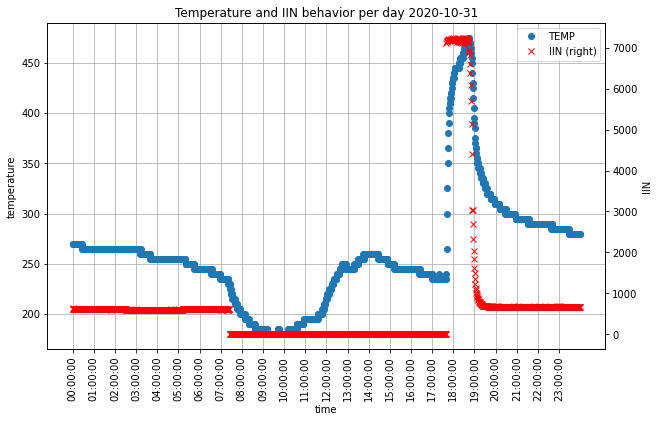

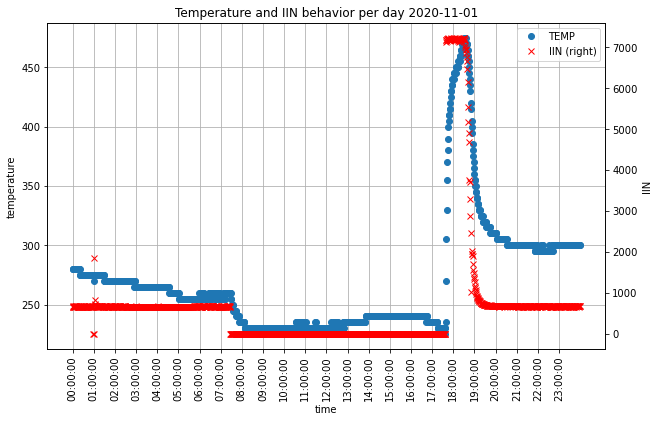

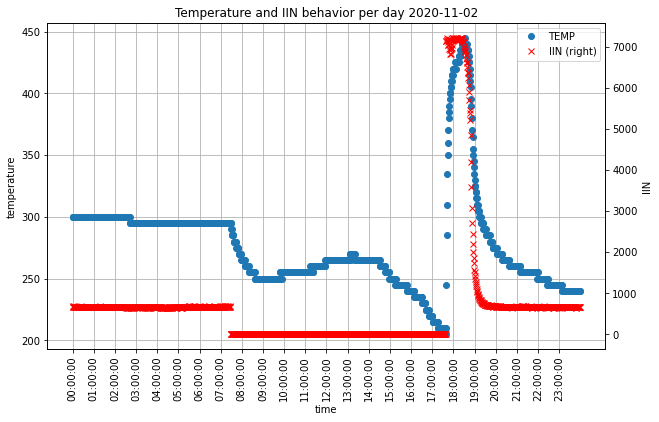

In [14]:
for i, date in enumerate(list_dat): 
    plt.figure(i)
    fig, ax1 = plt.subplots(figsize=(10,6))
    df=select_DF[select_DF.date==date]
    ax1.set_title('Temperature and IIN behavior per day {}'.format(date))
    ax1=df.plot(x='time', y='TEMP', ax=ax1, style='o',grid=True)
    ax2=df.plot(x='time', y='IIN', style='rx',ax=ax1,secondary_y=True,grid=True)
    ax1.set_ylabel('temperature')
    ax2.set_ylabel('IIN')
    ax1.set_xticks(interval)
    ax1.set_xticklabels(interval,rotation=90)
    plt.savefig('./187_critical/Temp_IIN/temp_IIN_{}.png'.format(date))
    #plt.show()

# VIN 

<Figure size 432x288 with 0 Axes>

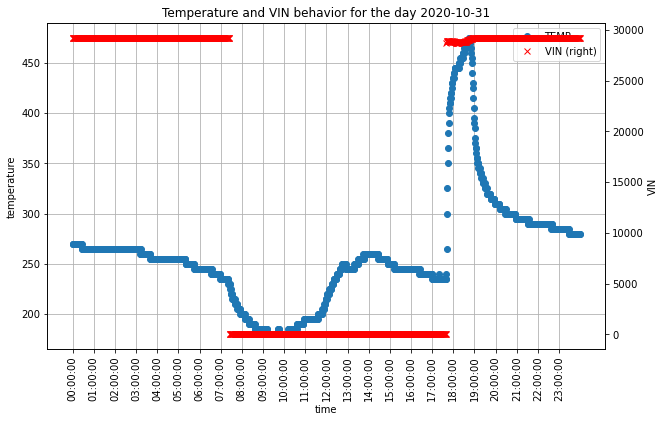

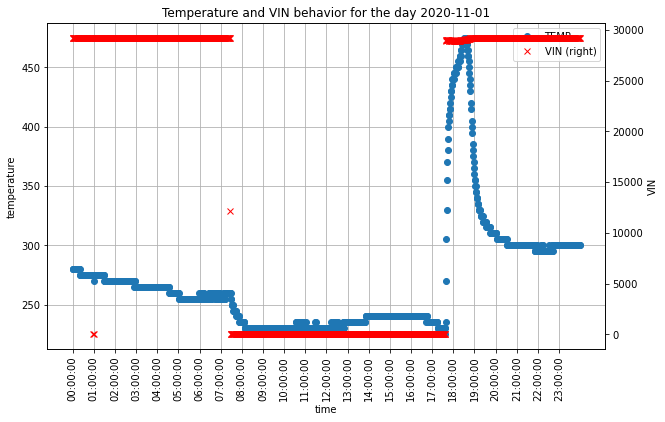

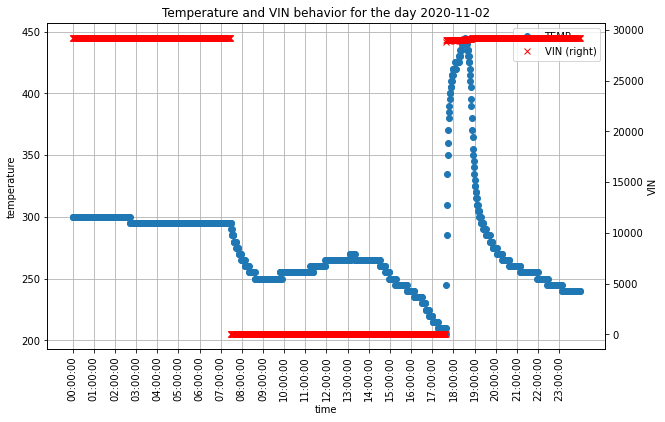

In [15]:
for i, date in enumerate(list_dat): 
    plt.figure(i)
    fig, ax1 = plt.subplots(figsize=(10,6))
    df=select_DF[select_DF.date==date]
    ax1.set_title('Temperature and VIN behavior for the day {}'.format(date))
    ax1=df.plot(x='time', y='TEMP', ax=ax1, style='o',grid=True)
    ax2=df.plot(x='time', y='VIN', style='rx',ax=ax1,secondary_y=True,grid=True)
    ax1.set_ylabel('temperature')
    ax2.set_ylabel('VIN')
    ax1.set_xticks(interval)
    ax1.set_xticklabels(interval,rotation=90)
    plt.savefig('./187_critical/Temp_VIN/temp_VIN_{}.png'.format(date))
    #plt.show()

# VBATT

<Figure size 432x288 with 0 Axes>

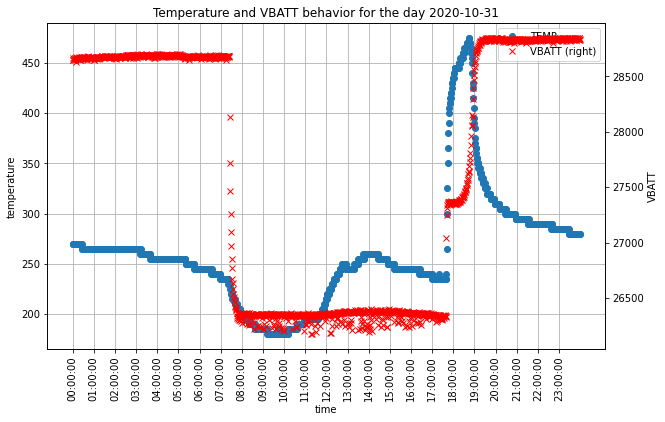

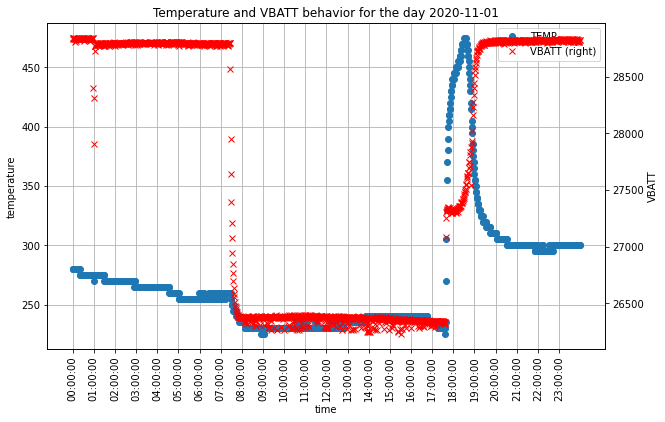

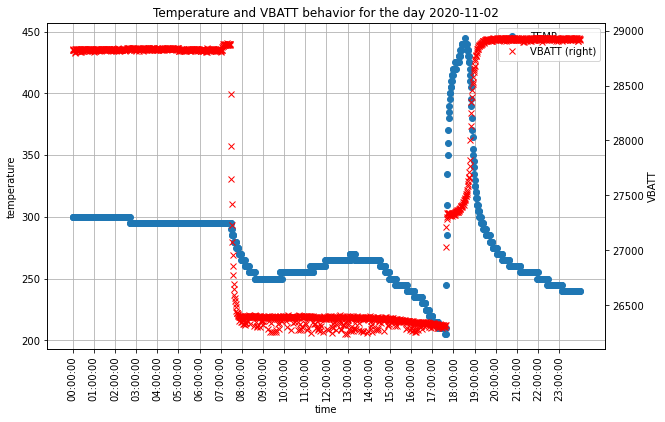

In [16]:
for i, date in enumerate(list_dat): 
    plt.figure(i)
    fig, ax1 = plt.subplots(figsize=(10,6))
    df=select_DF[select_DF.date==date]
    ax1.set_title('Temperature and VBATT behavior for the day {}'.format(date))
    ax1=df.plot(x='time', y='TEMP', ax=ax1, style='o',grid=True)
    ax2=df.plot(x='time', y='VBATT', style='rx',ax=ax1,secondary_y=True,grid=True)
    ax1.set_ylabel('temperature')
    ax2.set_ylabel('VBATT')
    ax1.set_xticks(interval)
    ax1.set_xticklabels(interval,rotation=90)
    plt.savefig('./187_critical/Temp_VBATT/temp_VBATT_{}.png'.format(date))
    #plt.show()

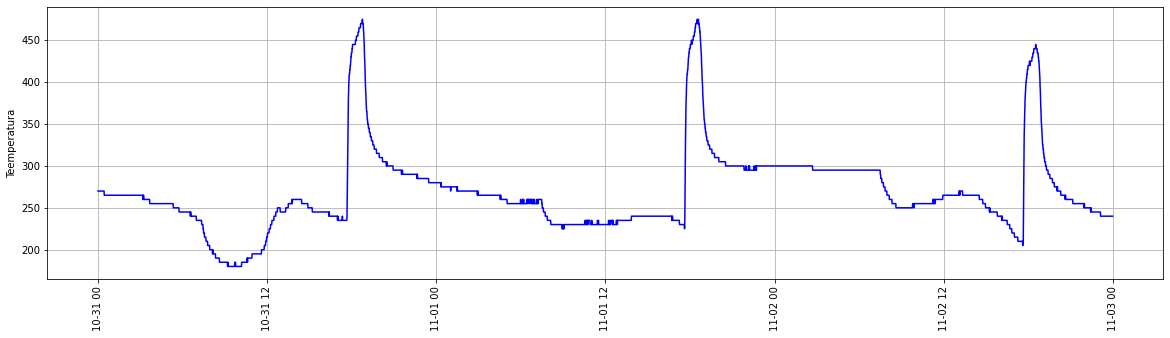

In [48]:
plt.figure(figsize=(20,5))
plt.plot(select_DF['DATE'],select_DF['TEMP'], 'b-')
plt.ylabel('Temperatura')
plt.xticks(rotation=90)
plt.grid()
plt.show()

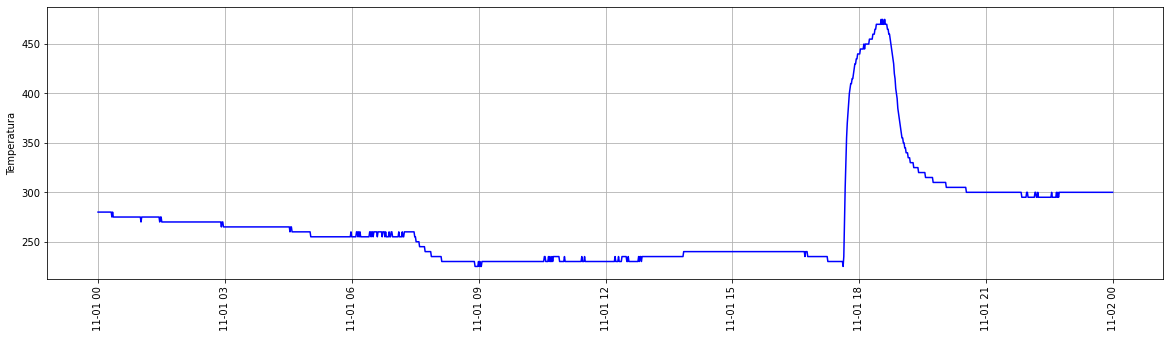

In [51]:
df=select_DF[select_DF.date==datetime.date(2020, 11, 1)]
plt.figure(figsize=(20,5))
plt.plot(df['DATE'],df['TEMP'], 'b-')
plt.ylabel('Temperatura')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [52]:
df

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
1465,2020-11-01 00:00:14,29230,677,29097,28837,665,280,16757,19176,00:00:14,2020-11-01,814U01M70187
1466,2020-11-01 00:01:12,29228,663,29097,28843,573,280,16758,16527,00:01:12,2020-11-01,814U01M70187
1467,2020-11-01 00:02:11,29231,657,29097,28842,576,280,16759,16612,00:02:11,2020-11-01,814U01M70187
1468,2020-11-01 00:03:10,29228,665,29097,28842,621,280,16760,17910,00:03:10,2020-11-01,814U01M70187
1469,2020-11-01 00:04:09,29228,661,29097,28838,626,280,16761,18052,00:04:09,2020-11-01,814U01M70187
...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2020-11-01 23:55:13,29230,668,29056,28811,595,300,18217,17142,23:55:13,2020-11-01,814U01M70187
2926,2020-11-01 23:56:12,29230,665,29097,28815,558,300,18218,16078,23:56:12,2020-11-01,814U01M70187
2927,2020-11-01 23:57:11,29228,661,29097,28808,614,300,18219,17688,23:57:11,2020-11-01,814U01M70187
2928,2020-11-01 23:58:10,29230,675,29056,28826,656,300,18220,18909,23:58:10,2020-11-01,814U01M70187


In [60]:
df1=df[(df.time>datetime.time(17,30,0))&(df.time<datetime.time(19,30,0))]
df1

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
2533,2020-11-01 17:30:03,0,0,26565,26342,651,230,17825,17148,17:30:03,2020-11-01,814U01M70187
2534,2020-11-01 17:31:02,0,0,26565,26341,639,230,17826,16831,17:31:02,2020-11-01,814U01M70187
2535,2020-11-01 17:32:01,0,0,26565,26337,607,230,17827,15986,17:32:01,2020-11-01,814U01M70187
2536,2020-11-01 17:33:00,0,0,26565,26320,697,230,17828,18345,17:33:00,2020-11-01,814U01M70187
2537,2020-11-01 17:33:59,0,0,26565,26335,697,230,17829,18355,17:33:59,2020-11-01,814U01M70187
...,...,...,...,...,...,...,...,...,...,...,...,...
2651,2020-11-01 19:25:58,29233,712,29014,28785,636,320,17943,18307,19:25:58,2020-11-01,814U01M70187
2652,2020-11-01 19:26:57,29232,722,29014,28798,586,320,17944,16875,19:26:57,2020-11-01,814U01M70187
2653,2020-11-01 19:27:57,29233,706,29014,28778,633,320,17945,18216,19:27:57,2020-11-01,814U01M70187
2654,2020-11-01 19:28:56,29235,698,29056,28801,618,320,17946,17799,19:28:56,2020-11-01,814U01M70187


In [69]:
df1.to_csv('temp_alta.csv',sep=';',index=False)

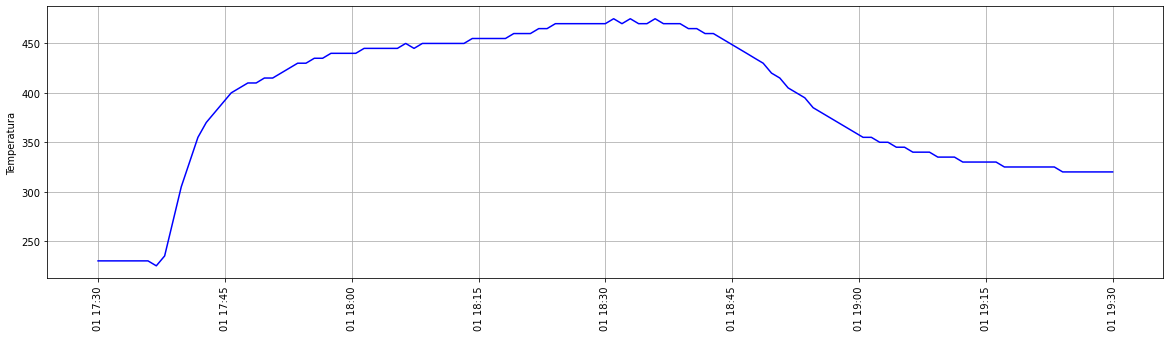

In [61]:
plt.figure(figsize=(20,5))
plt.plot(df1['DATE'],df1['TEMP'], 'b-',label='2020-11-01')
plt.ylabel('Temperatura')
plt.xticks(rotation=90)
plt.grid()
plt.show()

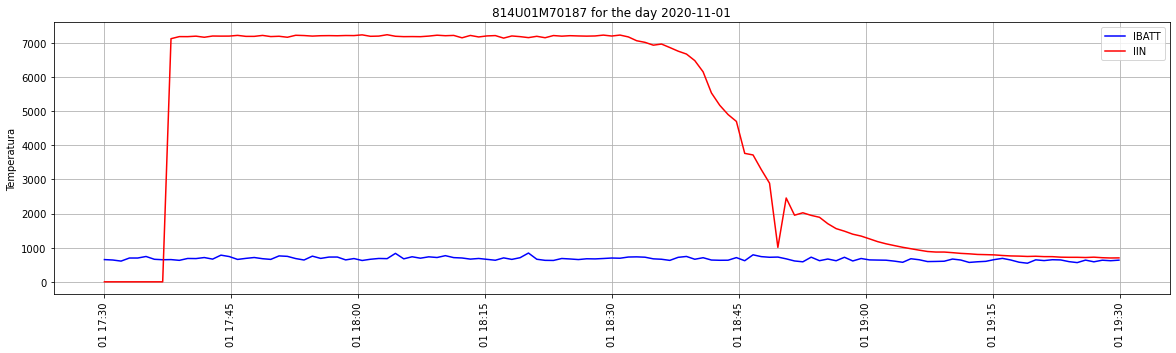

In [66]:
plt.figure(figsize=(20,5))
plt.plot(df1['DATE'],df1['IBATT'], 'b-',label='IBATT')
plt.plot(df1['DATE'],df1['IIN'], 'r-',label='IIN')
plt.title('814U01M70187 for the day 2020-11-01')
plt.ylabel('Temperatura')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.grid()
plt.show()

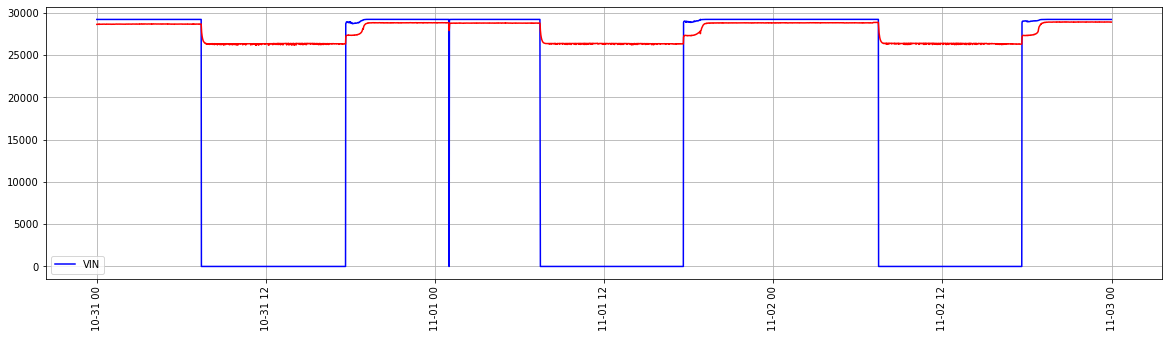

In [68]:
plt.figure(figsize=(20,5))
plt.plot(select_DF['DATE'],select_DF['VIN'], 'b-',label='VIN')
plt.plot(select_DF['DATE'],select_DF['VBATT'], 'r-')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.grid()
plt.show()

## 5-0041

In [19]:
path_0041='./0041'
colum=['DATE', 'VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP', 'JP', 'CNT','STS', 'MIN', 'POWER', 'AUTOBCKLIGHT', 'CURRLIGHT', 'BRIGHTNESS',
       'PAN1VOLT', 'PAN1CURR', 'BCK1VOLT', 'BCK1CURR', 'RSSI', 'time','date','Batt_id']
my_Data2=pd.DataFrame(columns=colum)
for i, file in enumerate(glob.glob(path_0041+"/*.csv")):
    #print(file)
    pd_df= pd.read_csv(file, sep=',')
    pd_df['DATE'] = pd.to_datetime(pd_df['DATE'])
    pd_df['time']=[x.time() for x in pd_df['DATE']]
    pd_df['date']=[x.date() for x in pd_df['DATE']]
    pd_df['Batt_id']=file.split('\\')[1][0:-10]
    my_Data2=my_Data2.append(pd_df,ignore_index=True)

In [20]:
my_Data2 = my_Data2.rename({'Batt_id': 'host_id'}, axis='columns')
my_Data2=my_Data2[['DATE', 'VIN', 'IIN', 'VOUT', 'VBATT', 'IBATT', 'TEMP', 'CNT',  'POWER', 'time', 'date', 'host_id']]

In [21]:
DF_highTemp2=my_Data2[my_Data2.TEMP>=400]
DF_highTemp2

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
2061,2020-11-14 18:10:12,29150,3988,27188,27257,585,405,3630,15945,18:10:12,2020-11-14,814U01M70041
2062,2020-11-14 18:11:11,29138,3991,27188,27265,558,405,3631,15213,18:11:11,2020-11-14,814U01M70041
2063,2020-11-14 18:12:10,29137,3967,27188,27265,666,405,3632,18158,18:12:10,2020-11-14,814U01M70041
2064,2020-11-14 18:13:09,29138,3967,27188,27267,671,405,3633,18296,18:13:09,2020-11-14,814U01M70041
2065,2020-11-14 18:14:08,29140,3963,27188,27260,722,405,3634,19681,18:14:08,2020-11-14,814U01M70041
2066,2020-11-14 18:15:07,29153,3907,27188,27268,639,405,3635,17424,18:15:07,2020-11-14,814U01M70041
2067,2020-11-14 18:16:07,29148,3875,27188,27261,625,405,3636,17038,18:16:07,2020-11-14,814U01M70041
2068,2020-11-14 18:17:06,29156,3866,27188,27251,635,405,3637,17304,18:17:06,2020-11-14,814U01M70041
2069,2020-11-14 18:18:05,29150,3838,27188,27261,643,405,3638,17528,18:18:05,2020-11-14,814U01M70041
2070,2020-11-14 18:19:04,29147,3836,27188,27262,661,405,3639,18020,18:19:04,2020-11-14,814U01M70041


In [38]:
my_Data2.date.iloc[0]

datetime.date(2020, 11, 13)

In [39]:
sel_2=my_Data2[(my_Data2.date==datetime.date(2020, 11, 14))]
sel_2

,DATE,VIN,IIN,VOUT,VBATT,IBATT,TEMP,CNT,POWER,time,date,host_id
956,2020-11-14 00:00:10,29212,560,28599,28690,558,255,2525,16009,00:00:10,2020-11-14,814U01M70041
957,2020-11-14 00:01:10,29213,558,28641,28690,665,255,2526,19078,00:01:10,2020-11-14,814U01M70041
958,2020-11-14 00:02:09,29215,549,28641,28691,558,255,2527,16009,00:02:09,2020-11-14,814U01M70041
959,2020-11-14 00:03:08,29212,553,28641,28686,607,255,2528,17412,00:03:08,2020-11-14,814U01M70041
960,2020-11-14 00:04:07,29212,563,28641,28695,588,255,2529,16872,00:04:07,2020-11-14,814U01M70041
...,...,...,...,...,...,...,...,...,...,...,...,...
2411,2020-11-14 23:55:17,29218,549,28641,28695,598,265,3980,17159,23:55:17,2020-11-14,814U01M70041
2412,2020-11-14 23:56:17,29215,553,28641,28702,593,265,3981,17020,23:56:17,2020-11-14,814U01M70041
2413,2020-11-14 23:57:16,29213,557,28641,28702,666,265,3982,19115,23:57:16,2020-11-14,814U01M70041
2414,2020-11-14 23:58:15,29215,560,28641,28697,644,265,3983,18480,23:58:15,2020-11-14,814U01M70041


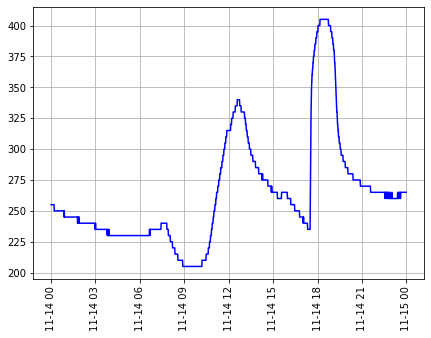

In [43]:
plt.figure(figsize=(7,5))
plt.plot(sel_2['DATE'],sel_2['TEMP'], 'b')
plt.xticks(rotation=90)
plt.grid()
plt.show()

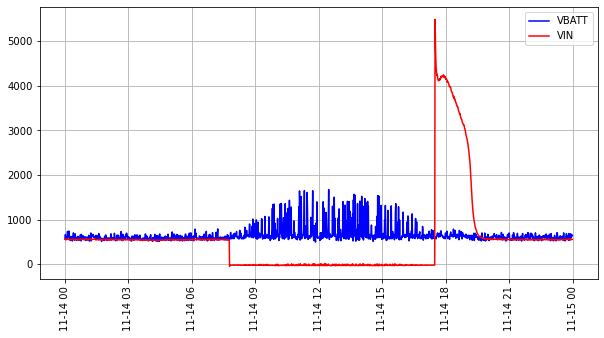

In [44]:
plt.figure(figsize=(10,5))
plt.plot(sel_2['DATE'],sel_2['IBATT'], 'b-', label='IBATT')
plt.plot(sel_2['DATE'],sel_2['IIN'], 'r-',label='IIN')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.grid()
plt.show()

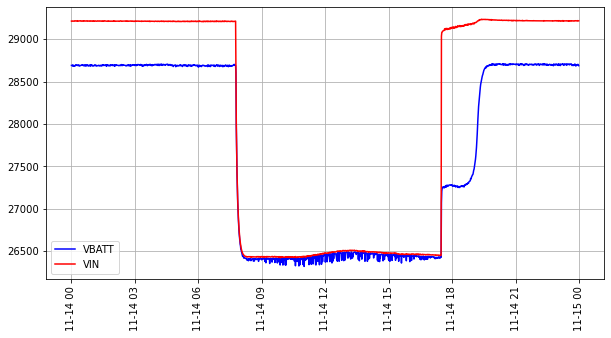

In [45]:
plt.figure(figsize=(10,5))
plt.plot(sel_2['DATE'],sel_2['VBATT'], 'b-',label='VBATT')
plt.plot(sel_2['DATE'],sel_2['VIN'], 'r-',label='VIN')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.grid()
plt.show()